In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import bokeh.models as bm
import bokeh.plotting as pl
from bokeh.io import output_notebook
from bokeh.palettes import Category10_10

# Read the CSV file with counts
df = pd.read_csv('unique_words_AM.csv')


# Amharic

## Tone

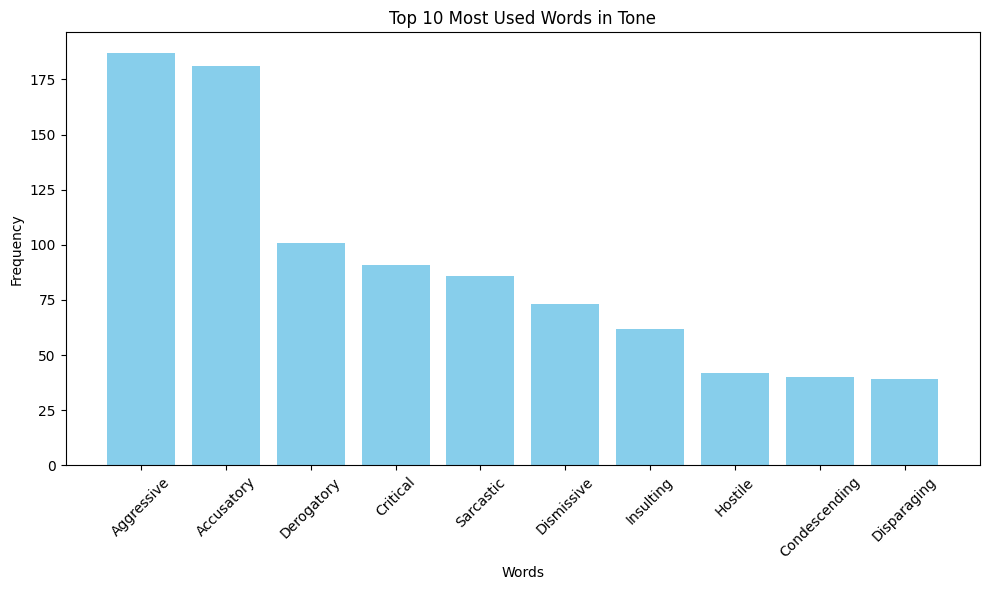

            Tone  Tone appears
0     Aggressive         187.0
1     Accusatory         181.0
2     Derogatory         101.0
3       Critical          91.0
4      Sarcastic          86.0
5     Dismissive          73.0
6      Insulting          62.0
7        Hostile          42.0
8  Condescending          40.0
9    Disparaging          39.0


In [20]:
# Plot histogram for the 'Tone' column
tone_df = df[['Tone', 'Tone appears']].sort_values(by='Tone appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(tone_df['Tone'], tone_df['Tone appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(tone_df)

## Language

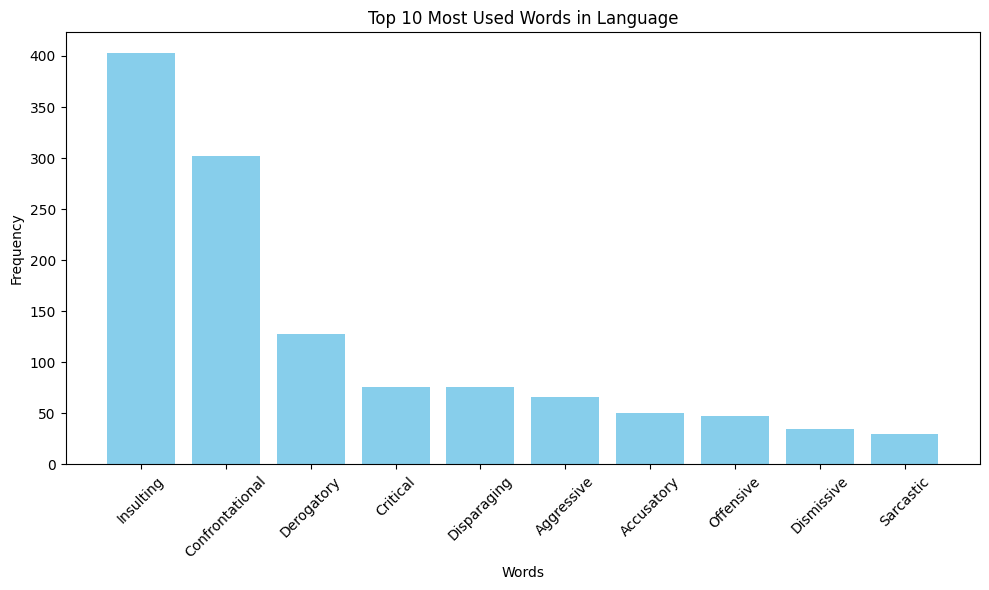

          Language  Language appears
0        Insulting             403.0
1  Confrontational             302.0
2       Derogatory             128.0
3         Critical              76.0
4      Disparaging              76.0
5       Aggressive              66.0
6       Accusatory              50.0
7        Offensive              47.0
8       Dismissive              35.0
9        Sarcastic              30.0


In [21]:
# Plot histogram for the 'Language' column
language_df = df[['Language', 'Language appears']].sort_values(by='Language appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(language_df['Language'], language_df['Language appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(language_df)

## Sentiment

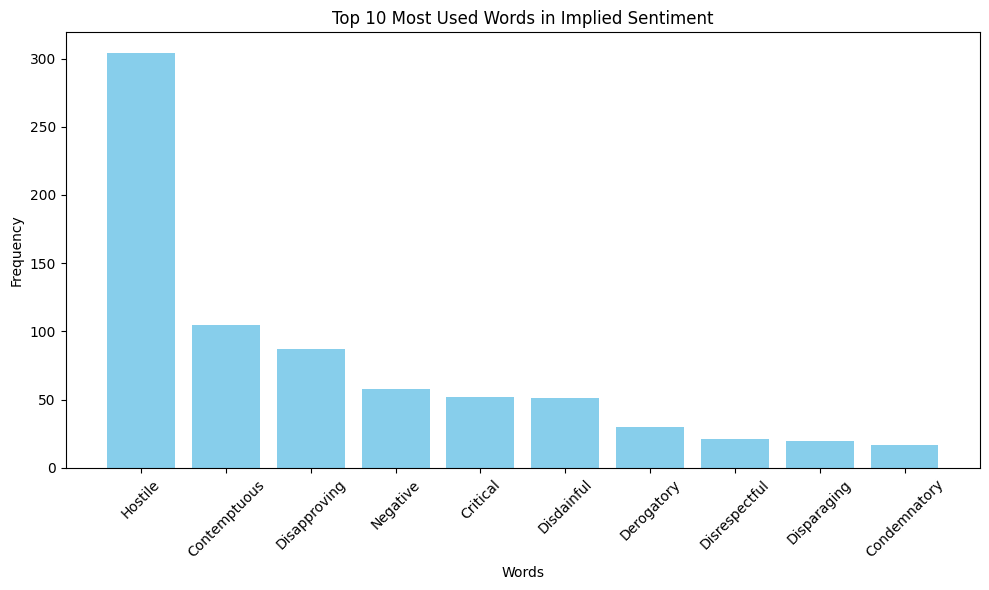

  Implied Sentiment  Implied Sentiment appears
0           Hostile                      304.0
1      Contemptuous                      105.0
2      Disapproving                       87.0
3          Negative                       58.0
4          Critical                       52.0
5        Disdainful                       51.0
6        Derogatory                       30.0
7     Disrespectful                       21.0
8       Disparaging                       20.0
9      Condemnatory                       17.0


In [22]:
# Plot histogram for the 'Implied Sentiment' column
implied_sentiment_df = df[['Implied Sentiment', 'Implied Sentiment appears']].sort_values(by='Implied Sentiment appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['Implied Sentiment'], implied_sentiment_df['Implied Sentiment appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Implied Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

## All together

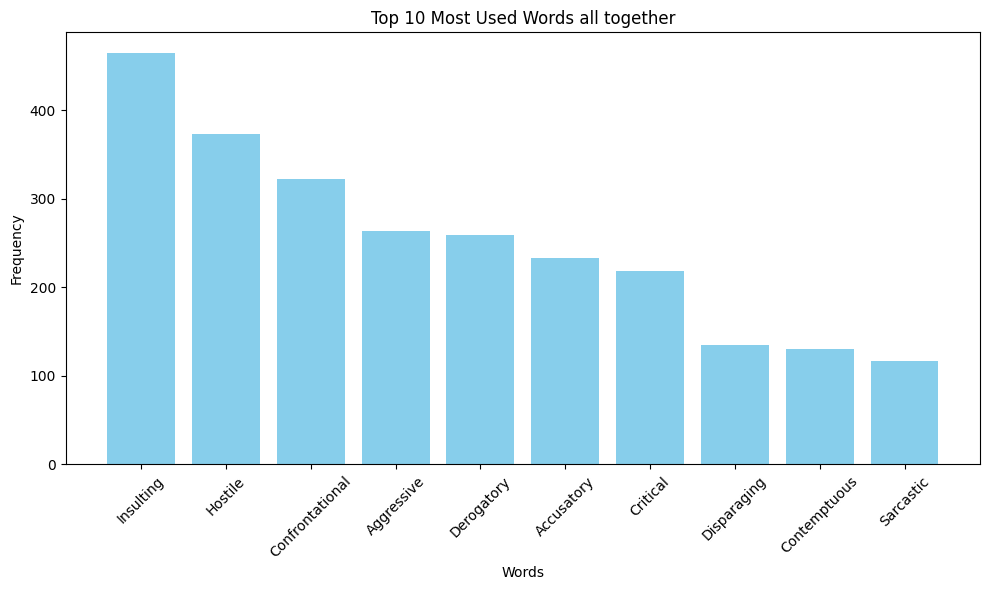

           combine  combine appears
0        Insulting            465.0
1          Hostile            373.0
2  Confrontational            323.0
3       Aggressive            264.0
4       Derogatory            259.0
5       Accusatory            233.0
6         Critical            219.0
7      Disparaging            135.0
8     Contemptuous            130.0
9        Sarcastic            117.0


In [23]:
# Plot histogram for the 'Combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(combine_df['combine'], combine_df['combine appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words all together')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(combine_df)

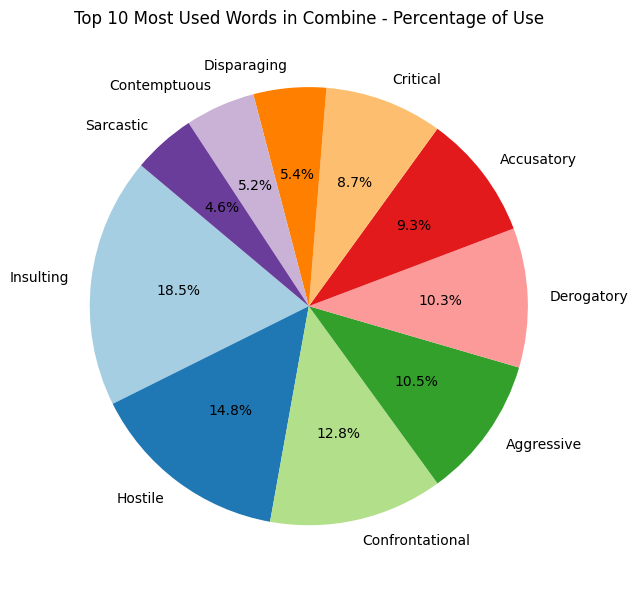

In [24]:
total_sentences = 1000

# Get the top 10 most used words from the 'combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)

# Calculate the percentage of use for each word
combine_df['percentage'] = (combine_df['combine appears'] / total_sentences) * 100

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(combine_df['percentage'], labels=combine_df['combine'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Used Words in Combine - Percentage of Use')
plt.tight_layout()
plt.show()

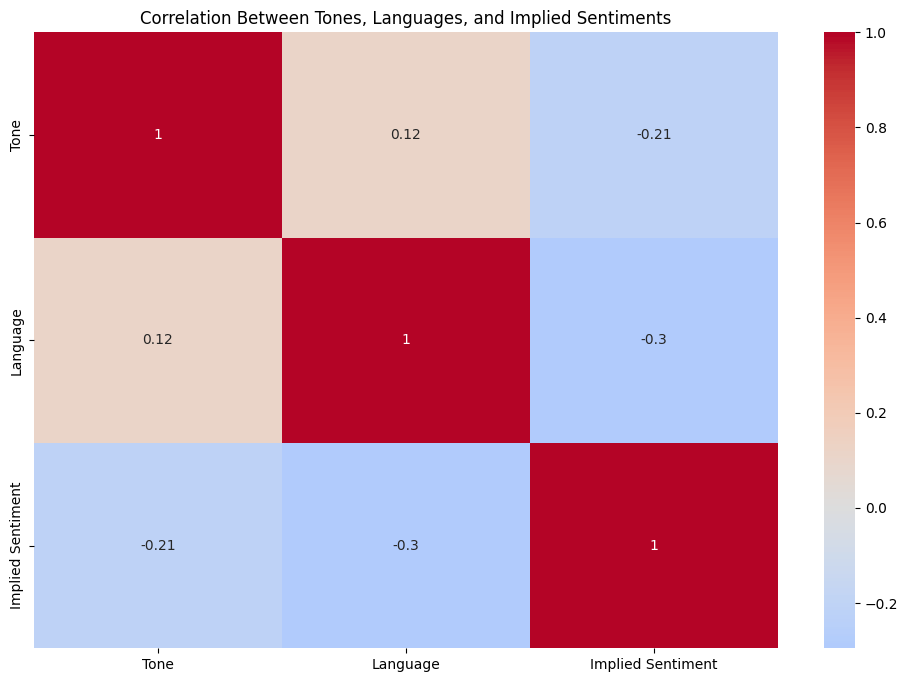

In [25]:
# Combine all data into one DataFrame for correlation analysis
combined_df = pd.DataFrame({
    'Tone': tone_df.set_index('Tone')['Tone appears'],
    'Language': language_df.set_index('Language')['Language appears'],
    'Implied Sentiment': implied_sentiment_df.set_index('Implied Sentiment')['Implied Sentiment appears']
}).fillna(0)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Tones, Languages, and Implied Sentiments')
plt.show()

## Toxic Words

In [26]:
df_t = pd.read_csv('AM-toxicWordsList.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

print(df_toxic)

  uniq sequences  number appears
0            ደደብ              57
1           ደንቆሮ              36
2             ውሻ              35
3           ሰይጣን              31
4             ጅል              29
5            ዘረኛ              28
6          አስመሳይ              21
7           ማፈሪያ              19
8            ደነዝ              18
9            ውሸት              17


## Toxic Words After Translation

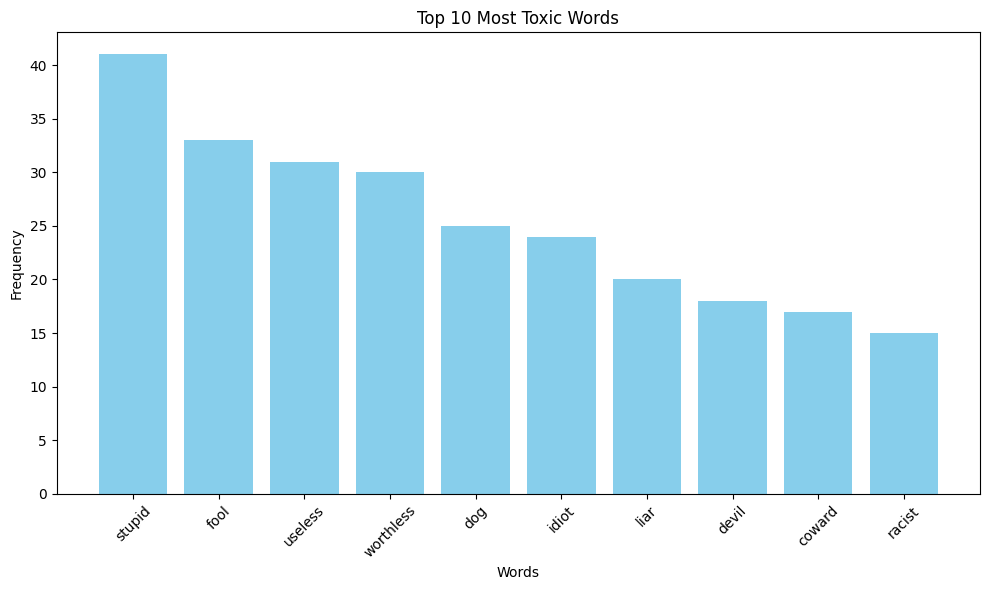

  uniq sequences  number appears
0         stupid              41
1           fool              33
2        useless              31
3      worthless              30
4            dog              25
5          idiot              24
6           liar              20
7          devil              18
8         coward              17
9         racist              15


In [27]:
df_t = pd.read_csv('600-test/AM-toxic.csv')
df_toxic = df_t[['uniq sequences', 'number appears']].sort_values(by='number appears', ascending=False).head(10).reset_index(drop=True)
df_toxic['uniq sequences'] = df_toxic['uniq sequences'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(df_toxic['uniq sequences'], df_toxic['number appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Toxic Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(df_toxic)

## Clustering With Tone Presentation

In [28]:

# Read the CSV file into a Pandas DataFrame
file_path = 'AM-analyze-cluster.csv'
df = pd.read_csv(file_path)

# Extract the Keyword Vector column
keyword_vectors = np.array(df['Keyword Vector'].apply(eval).tolist())

# Compute PCA to reduce the dimensionality of the Keyword Vector
keyword_vectors_pca = PCA(n_components=2).fit_transform(keyword_vectors)

# Normalize vectors to have zero mean and unit variance
keyword_vectors_pca = StandardScaler().fit_transform(keyword_vectors_pca)

# Initialize Bokeh for notebook output
output_notebook()

# Function to draw interactive plot for data points with auxiliary info on hover
def draw_vectors(x, y, phrases, cluster_labels, radius=10, alpha=0.6, width=600, height=400, max_sentence_length=70, show=True, **kwargs):
    # Truncate sentences that are too long
    truncated_phrases = [phrase[:max_sentence_length] + '...' if len(phrase) > max_sentence_length else phrase for phrase in phrases]
    colors = [Category10_10[i] for i in cluster_labels]
    data_source = bm.ColumnDataSource({"x": x, "y": y, "phrases": truncated_phrases, "color": colors, **kwargs})
    fig = pl.figure(active_scroll="wheel_zoom", width=width, height=height)
    scatter = fig.scatter("x", "y", size=radius, color="color", alpha=alpha, source=data_source)
    hover_tool = bm.HoverTool(tooltips=[("Phrase", "@phrases")] + [(key, "@" + key) for key in kwargs.keys()], mode="mouse")
    fig.add_tools(hover_tool)
    if show:
        pl.show(fig)
    return fig

# Plotting the phrases in 2D space
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Tone'].tolist(), df['K_means_cluster'].tolist())


Loading BokehJS ...

figure(id='p1200', ...)

## Clustering With Language Presentation

In [29]:
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Language'].tolist(), df['K_means_cluster'].tolist())

figure(id='p1249', ...)

## Clustering With Sentiment Presentation

In [30]:
draw_vectors(keyword_vectors_pca[:, 0], keyword_vectors_pca[:, 1], df['Implied Sentiment'].tolist(), df['K_means_cluster'].tolist())

figure(id='p1298', ...)